In [85]:
import os
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
url = 'https://companies-market-cap-copy.vercel.app/index.html'
response = requests.get(url)
response

<Response [200]>

In [87]:
soup = BeautifulSoup(response.text, "html.parser")
soup


<!DOCTYPE html>

<html lang="en-US">
<head>
<title>Tesla (TSLA) - Revenue</title>
<meta charset="utf-8"/>
<link href="https://companiesmarketcap.com/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/img/icons/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/img/icons/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/img/icons/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/img/icons/apple-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/>
<link href="/img/icons/apple-icon-114x114.png" rel="apple-touch-icon" sizes="114x114"/>
<link href="/img/icons/apple-icon-120x120.png" rel="apple-touch-icon" sizes="120x120"/>
<link href="/img/icons/apple-icon-144x144.png" rel="apple-touch-icon" sizes="144x144"/>
<link href="/img/icons/apple-icon-152x152.png" rel="apple-touch-icon" sizes="152x152"/>
<link href="/img/icons/apple-icon-180x180.png" rel="apple-touch-icon" sizes="180x180"/>
<link href="/img/ic

In [88]:
element = soup.find_all("table", limit = 1)[0]
filas = element.find_all('tr')
filas

[<tr>
 <th>Year</th>
 <th>Revenue</th>
 <th>Change</th>
 </tr>,
 <tr><td><span class="year">2024</span></td><td>$97.15 B</td><td class="percentage-green">0.39%</td></tr>,
 <tr><td><span class="year">2023</span> </td><td>$96.77 B</td><td class="percentage-green">18.8%</td></tr>,
 <tr><td><span class="year">2022</span></td><td>$81.46 B</td><td class="percentage-green">51.35%</td></tr>,
 <tr><td><span class="year">2021</span></td><td>$53.82 B</td><td class="percentage-green">70.67%</td></tr>,
 <tr><td><span class="year">2020</span></td><td>$31.53 B</td><td class="percentage-green">28.31%</td></tr>,
 <tr><td><span class="year">2019</span></td><td>$24.57 B</td><td class="percentage-green">14.52%</td></tr>,
 <tr><td><span class="year">2018</span></td><td>$21.46 B</td><td class="percentage-green">82.51%</td></tr>,
 <tr><td><span class="year">2017</span></td><td>$11.75 B</td><td class="percentage-green">67.98%</td></tr>,
 <tr><td><span class="year">2016</span></td><td>$7.00 B</td><td class="pe

In [89]:
datos_Tesla = []
for fila in filas[1:]:
    filas_valores = fila.find_all("td")
    fecha = filas_valores[0].text.strip()
    ingresos = filas_valores[1].text.strip()
    revenue = filas_valores[2].text.strip()
    datos_Tesla.append([fecha, ingresos,revenue])
    datos_Tesla

In [90]:
df = pd.DataFrame(datos_Tesla, columns = ['año', 'revenue', 'cambio'])
df = df.sort_values('año')
df

,año,revenue,cambio
15,2009,$0.11 B,
14,2010,$0.11 B,4.29%
13,2011,$0.20 B,74.95%
12,2012,$0.41 B,102.34%
11,2013,$2.01 B,387.23%
10,2014,$3.19 B,58.85%
9,2015,$4.04 B,26.5%
8,2016,$7.00 B,73.01%
7,2017,$11.75 B,67.98%
6,2018,$21.46 B,82.51%


In [91]:
def limpiar(valor):
    valor = valor.replace("B", "").replace("$", "").replace("%", "").replace(" ", "").strip()
    if valor: 
        return float(valor)
    else: 
        return None  

df_corregido = df['revenue'].apply(limpiar)

df_corregido

15     0.11
14     0.11
13     0.20
12     0.41
11     2.01
10     3.19
9      4.04
8      7.00
7     11.75
6     21.46
5     24.57
4     31.53
3     53.82
2     81.46
1     96.77
0     97.15
Name: revenue, dtype: float64

In [92]:
con = sqlite3.connect("Ingresos_Tesla.db")

cur = con.cursor()

cur.execute("""
CREATE TABLE IF NOT EXISTS Ingresos_anuales(
    año TEXT,
    revenue REAL,
    cambio REAL
               
)
""")

df.to_sql('ingresos', con, if_exists='append', index=False)


con.commit()
con.close()


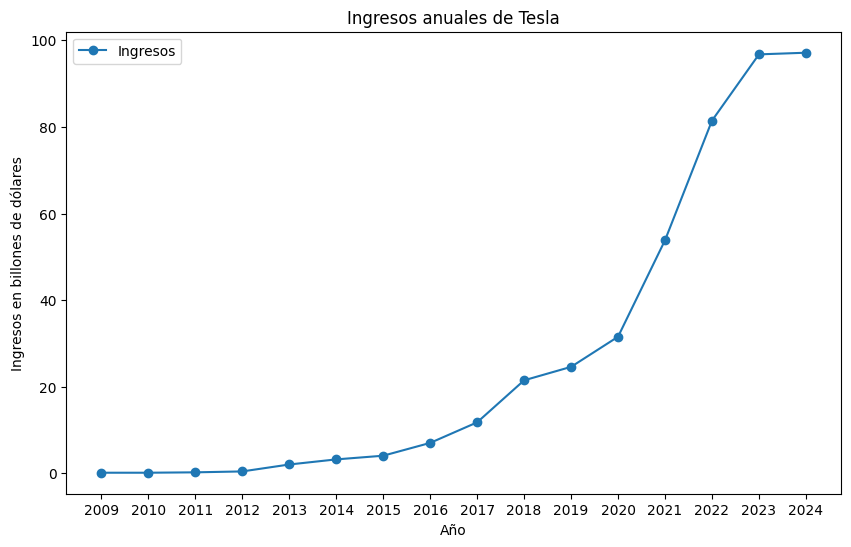

In [93]:
plt.figure(figsize=(10, 6))
plt.plot(df["año"], df_corregido, marker='o', label="Ingresos")
plt.title("Ingresos anuales de Tesla")
plt.xlabel("Año")
plt.ylabel("Ingresos en billones de dólares")
plt.legend()


plt.show()

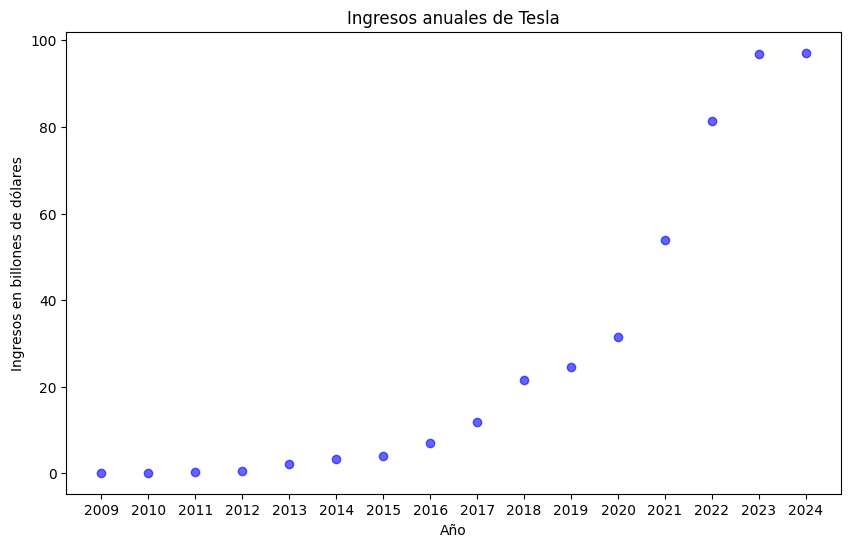

In [94]:
plt.figure(figsize=(10, 6)) 
plt.scatter(df["año"], df_corregido, color='blue', alpha=0.6) 
plt.title('Ingresos anuales de Tesla')
plt.xlabel('Año')
plt.ylabel('Ingresos en billones de dólares')  
plt.show()

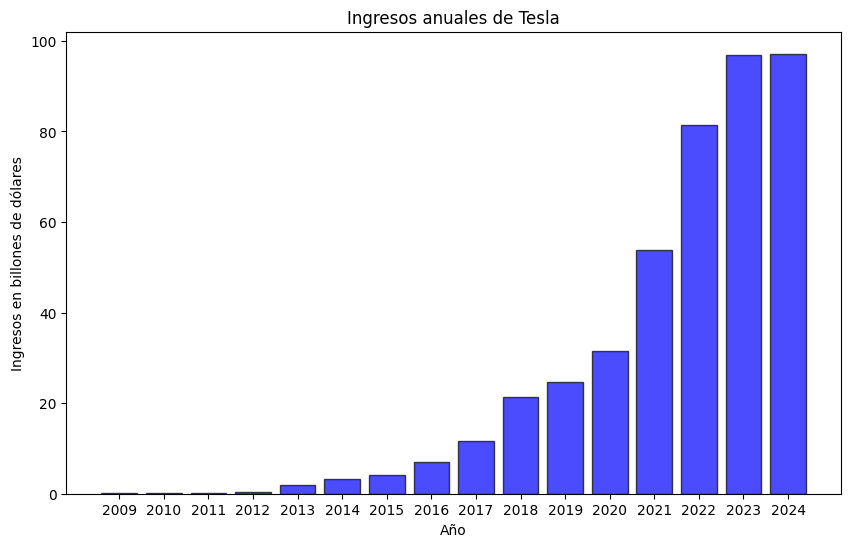

In [95]:
plt.figure(figsize=(10, 6))
plt.bar(df["año"], df_corregido, color='blue', alpha=0.7, edgecolor="black")

plt.title('Ingresos anuales de Tesla')
plt.xlabel('Año')
plt.ylabel('Ingresos en billones de dólares')

plt.show()


In [106]:
df['revenue'] = df_corregido
Beneficios_2024 = df['revenue'].loc[0]
Último_año = df['año'].loc[0]
Beneficios_2024 = int(Beneficios_2024 * 1_000_000 * 1_000_000)

beneficios_finales = f"Tesla ha ganado ${Beneficios_2024:,.2f} de dólares en el año {Último_año} ."
print(beneficios_finales)

Tesla ha generado $97,150,000,000,000.00 de ganancias en el año 2024 .
